In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('StressLevelDataset.csv')
df.shape[0]

1100

In [3]:
df['stress_level'].unique()

array([1, 2, 0], dtype=int64)

In [24]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,1
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,1
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


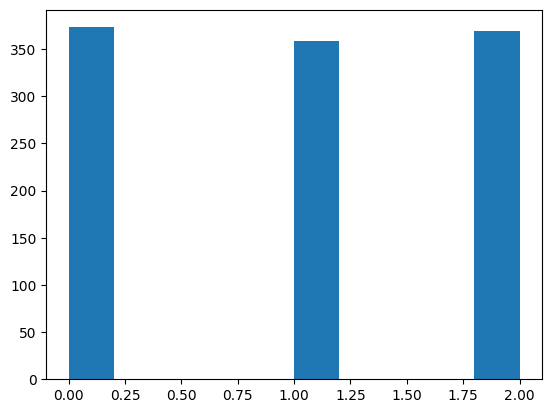

In [5]:
plt.hist(df['stress_level'])
plt.show()

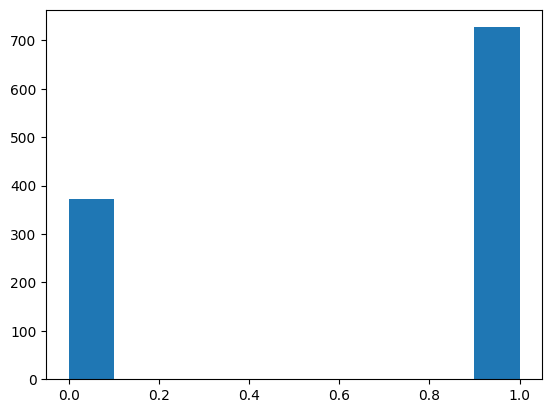

In [6]:
updated_rows = df["stress_level"] >= 1
df.loc[updated_rows, "stress_level"] = 1
plt.hist(df['stress_level'])
plt.show()

In [9]:
scaled_train_df = scaler.transform(X_train)
scaled_test_df = scaler.transform(X_test)

In [8]:
features, label = df.iloc[:,:-1], df["stress_level"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1, stratify=label)
scaler = preprocessing.StandardScaler().fit(X_train)

In [10]:
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(scaled_train_df,y_train)
    print('k = ' +str(k)+', score: '+str(knn.score(scaled_test_df, y_test)))

k = 1, score: 0.9136363636363637
k = 2, score: 0.8909090909090909
k = 3, score: 0.9181818181818182
k = 4, score: 0.9181818181818182
k = 5, score: 0.9363636363636364
k = 6, score: 0.9272727272727272
k = 7, score: 0.9363636363636364
k = 8, score: 0.9363636363636364
k = 9, score: 0.9454545454545454
k = 10, score: 0.9409090909090909
k = 11, score: 0.9454545454545454
k = 12, score: 0.9454545454545454
k = 13, score: 0.9454545454545454
k = 14, score: 0.9454545454545454
k = 15, score: 0.95
k = 16, score: 0.95
k = 17, score: 0.95
k = 18, score: 0.95
k = 19, score: 0.95


In [93]:
#k-fold cross validaton
from sklearn.model_selection import cross_val_score
for k in range(1,40):
    knn_cv = KNeighborsClassifier(n_neighbors = k)

    cv_scores = cross_val_score(knn_cv, scaled_train_df, y_train, cv=5)

    #print each cv score (accuracy) and average them
#     print(cv_scores)
#     print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    print('k = ' +str(k)+', score: '+str(np.mean(cv_scores)))

k = 1, score: 0.9181818181818182
k = 2, score: 0.8977272727272727
k = 3, score: 0.9181818181818182
k = 4, score: 0.9125
k = 5, score: 0.9215909090909091
k = 6, score: 0.9204545454545455
k = 7, score: 0.9227272727272726
k = 8, score: 0.9170454545454545
k = 9, score: 0.9238636363636363
k = 10, score: 0.9227272727272726
k = 11, score: 0.925
k = 12, score: 0.9238636363636363
k = 13, score: 0.9238636363636363
k = 14, score: 0.9238636363636363
k = 15, score: 0.925
k = 16, score: 0.925
k = 17, score: 0.925
k = 18, score: 0.925
k = 19, score: 0.9261363636363636
k = 20, score: 0.9261363636363636
k = 21, score: 0.9261363636363636
k = 22, score: 0.9261363636363636
k = 23, score: 0.9261363636363636
k = 24, score: 0.925
k = 25, score: 0.9261363636363636
k = 26, score: 0.9261363636363636
k = 27, score: 0.9261363636363636
k = 28, score: 0.9261363636363636
k = 29, score: 0.9261363636363636
k = 30, score: 0.9261363636363636
k = 31, score: 0.9261363636363636
k = 32, score: 0.925
k = 33, score: 0.9261363

In [11]:
#create new a knn model pipeline
knn_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
#create a dictionary of all parameters we want to find out the best parameter
param_grid = {'knn__n_neighbors': np.arange(1, 40)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_pipeline, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

knn_best_pipeline = knn_gscv.best_estimator_
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
# print(knn_best_model)

{'knn__n_neighbors': 19}
0.9261363636363636


In [19]:
#create new a decision tree model pipeline
dt_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("dt", tree.DecisionTreeClassifier())])
param_grid = {'dt__max_depth':range(1,20)}
# Grid search to get the best decision tree model
dt_gscv = GridSearchCV(dt_pipeline, param_grid, n_jobs=4, cv=5)

dt_gscv.fit(X_train, y_train)

dt_best_pipeline = dt_gscv.best_estimator_
print (dt_gscv.best_score_, dt_gscv.best_params_)
#print(dt_best_model)

0.928409090909091 {'dt__max_depth': 2}


In [15]:
tree.plot_tree(dt_best_model)

NameError: name 'dt_best_model' is not defined

In [20]:
#create new a random forest tree model pipeline
rft_pipeline = Pipeline(steps=[("scaler", StandardScaler()), ("rft", RandomForestClassifier(random_state=0))])
param_grid = {'rft__max_depth':range(1,20)}

# Grid search to get the best random forest tree model
rft_gscv = GridSearchCV(rft_pipeline, param_grid, n_jobs=4, cv=5)

rft_gscv.fit(X_train, y_train)

rft_best_pipeline = rft_gscv.best_estimator_
print(rft_gscv.best_score_, rft_gscv.best_params_)
# print(rft_best_model)

0.9306818181818182 {'rft__max_depth': 10}


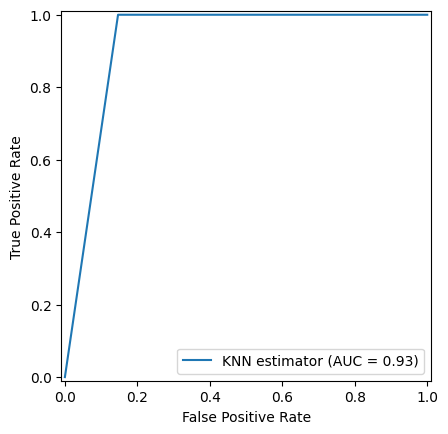

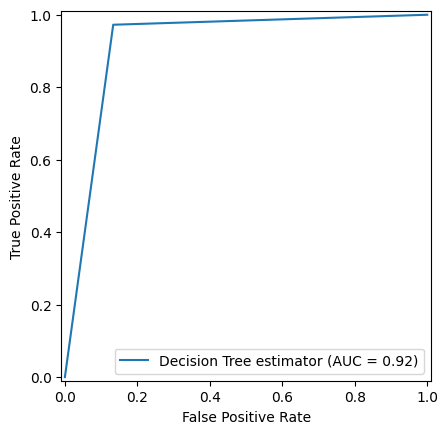

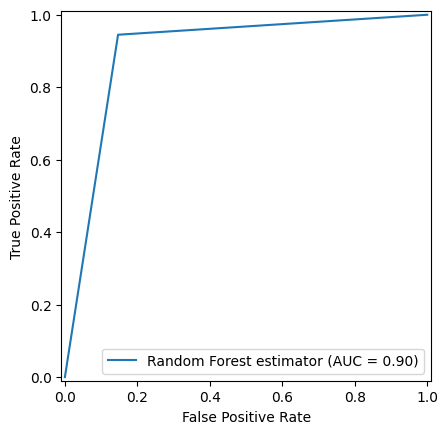

In [21]:
# KNN
pred = knn_best_pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN estimator')
display.plot()
plt.show()

# Decision tree
pred = dt_best_pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree estimator')
display.plot()
plt.show()

# Random Forest Tree
pred = rft_best_pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest estimator')
display.plot()
plt.show()

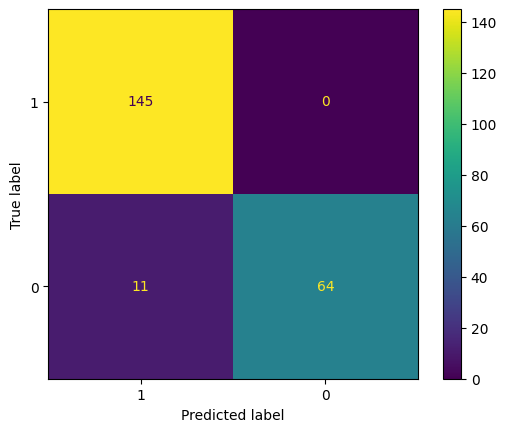

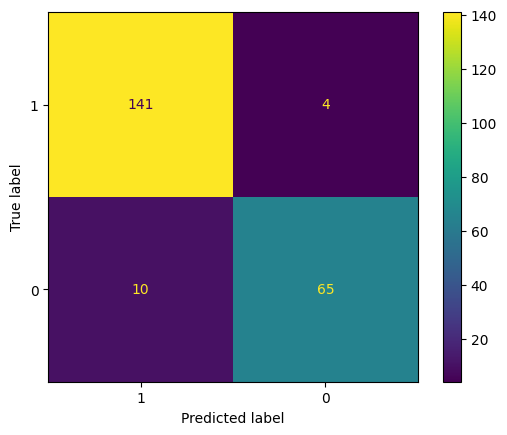

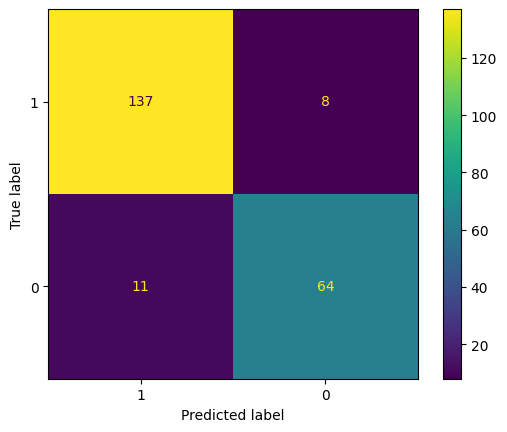

In [22]:
classes = y_test.unique()

# KNN
pred = knn_best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.show()

# Decision tree
pred = dt_best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.show()

# Random Forest Tree
pred = rft_best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=classes)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.show()

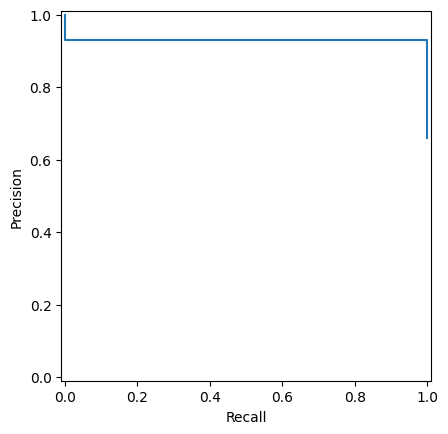

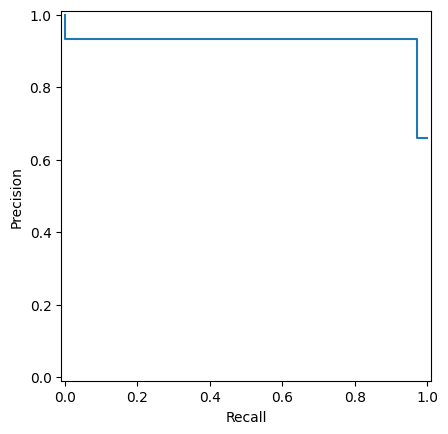

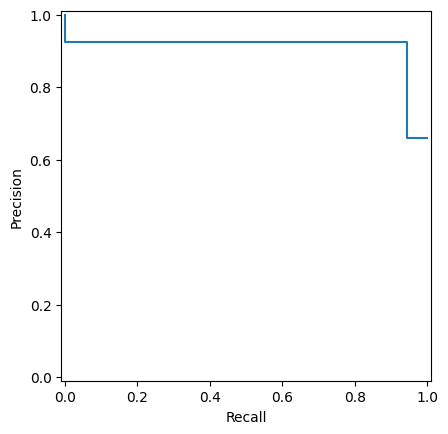

In [23]:
# KNN
predictions = knn_best_pipeline.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()

# Decision tree
predictions = dt_best_pipeline.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()

# Random Forest Tree
predictions = rft_best_pipeline.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.show()